# Li-Daie-2016 - A DataJoint example
The data and results presented in this notebook pertain to the paper:

>Nuo Li, Kayvon Daie, Karel Svoboda & Shaul Druckmann. "Robust neuronal dynamics in premotor cortex during motor planning" (2016) Nature (https://dx.doi.org/10.1038/nature17643)

This notebook provide demonstrations of working with a DataJoint data pipeline in querying data, apply data conditioning and reproduce some key figures in the paper. The orignal data , in NWB 2.0 format, had been ingested into a DataJoint data pipeline (data pipeline schema is given below). As a validation of complete ingestion of the original data into DataJoint, figures 2b, 2c, and extended figure 2 will be reproduced in this example.

In [1]:
import datajoint as dj
dj.conn().connect()

Please enter DataJoint username: root
Please enter DataJoint password: ········
Connecting root@localhost:3306


In [2]:
%matplotlib inline
import os
os.chdir('..')

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import signal

from pipeline import lab, experiment, ephys, psth
from pipeline.plot import unit_characteristic_plot, unit_psth

In [3]:
import warnings
warnings.filterwarnings('ignore')

##  Firing rate change from control induced by photoinhibition - Figure 1

In [4]:
subjects = lab.Subject & [{'subject_id': 255200},
                          {'subject_id': 255203},
                          {'subject_id': 255201},
                          {'subject_id': 257772},
                          {'subject_id': 258250}]

In [5]:
units = ephys.Unit & psth.UnitPsth & subjects

In [6]:
experiment.PhotostimEvent.proj() * experiment.Photostim * experiment.BrainLocation & units.proj()

subject_id institution 6 digit animal ID,session session number,trial trial number,photostim_event_id,photo_stim,brain_location_name unique name of this brain location (could be hash of the non-primary attr),photostim_device,ml_location um from ref ; right is positive; based on manipulator coordinates/reconstructed track,ap_location um from ref; anterior is positive; based on manipulator coordinates/reconstructed track,dv_location um from dura; ventral is positive; based on manipulator coordinates/reconstructed track,ml_angle Angle between the manipulator/reconstructed track and the Medio-Lateral axis. A tilt towards the right hemishpere is positive.,ap_angle Angle between the manipulator/reconstructed track and the Anterior-Posterior axis. An anterior tilt is positive.,waveform normalized to maximal power. The value of the maximal power is specified for each PhotostimTrialEvent individually,frequency (Hz),brain_area,hemisphere,skull_reference


In [20]:
unit_characteristic_plot.plot_psth_photostim_effect(units, ['left_alm', 'sample'])

AttributeError: 'numpy.ndarray' object has no attribute 'proj'

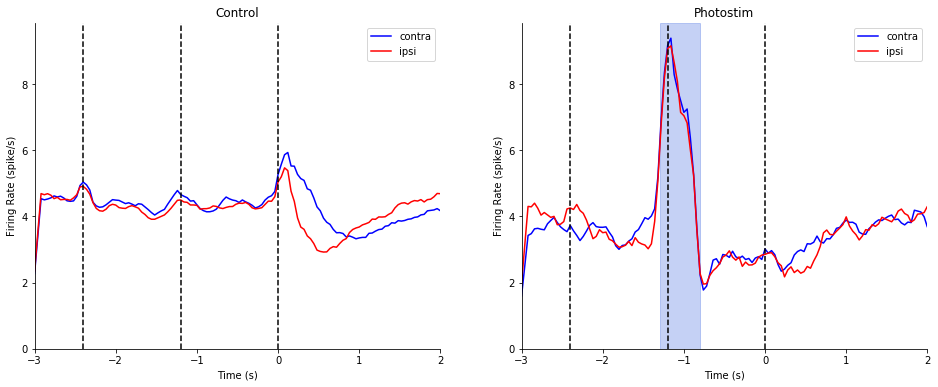

In [18]:
unit_characteristic_plot.plot_psth_photostim_effect(units, ['left_alm', 'early_delay'])

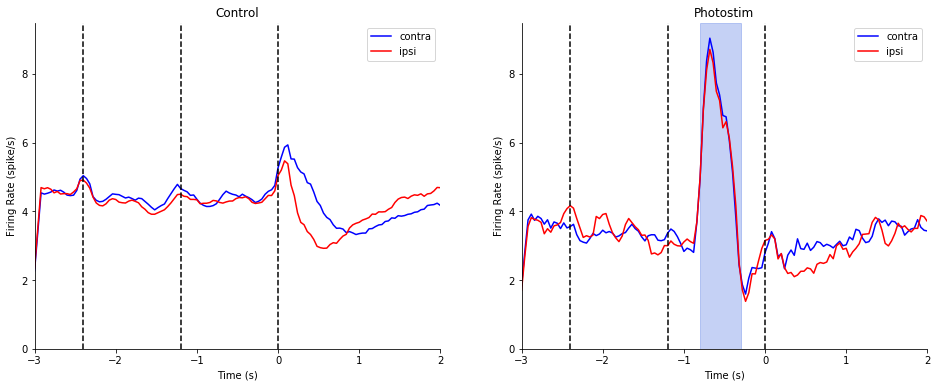

In [19]:
unit_characteristic_plot.plot_psth_photostim_effect(units, ['left_alm', 'middle_delay'])

# =====================================================

In [ ]:
import importlib
importlib.reload(unit_characteristic_plot)